In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Ejemplo de diseño y aplicación de filtros digitales (FIR)

Inicialmente se cre una señal de prueba con varios armónicos para observar el desempeño de los filtros
También se calcula su espectro de frecuencia usando la FFT

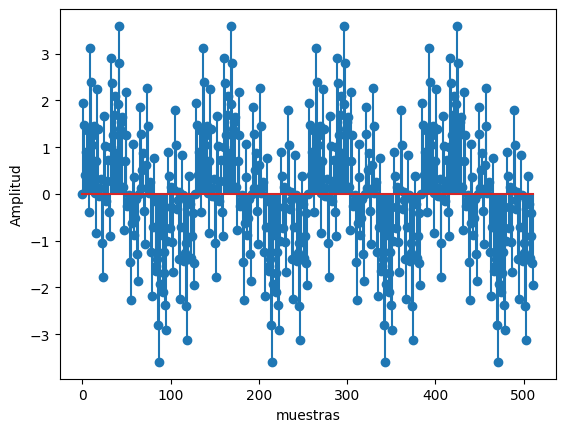

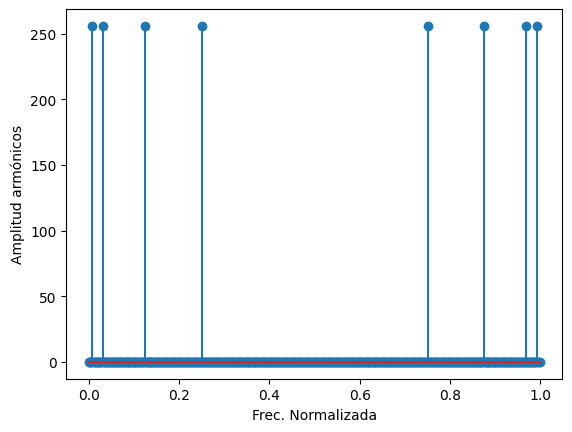

In [6]:
n = np.arange(0,512)
k = n/512
xn=np.sin(2*np.pi*n*1/4)+np.sin(2*np.pi*n*1/8)+np.sin(2*np.pi*n*1/32)+np.sin(2*np.pi*n*1/128)
Xk = abs(np.fft.fft(xn))

# Graficos

#señal
plt.figure(1)
plt.stem(n,xn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')

#magnitud del espectro
plt.figure(2)
plt.stem(k,Xk)
plt.xlabel('Frec. Normalizada')
plt.ylabel('Amplitud armónicos')
plt.show()

Diseño de filtro FIR pasa-bajos mediante método de enventanado

Frecuencia de corte 1/32 ciclos/muestra (frec. normalizada)

In [17]:
# Obteniendo coeficientes del filtro FIR
n_coef = 50
cut_f = 1/16 # 1/32 x 2
h1n = signal.firwin(n_coef,cut_f)
w, h = signal.freqz(h1n)

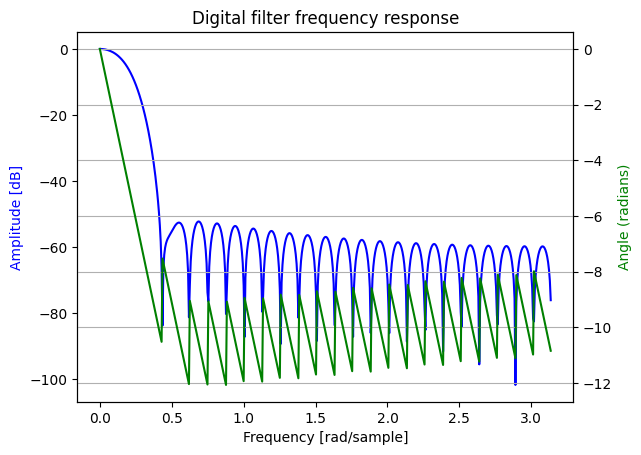

In [18]:

#Respuesta en frecuencia del filtro FIR
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

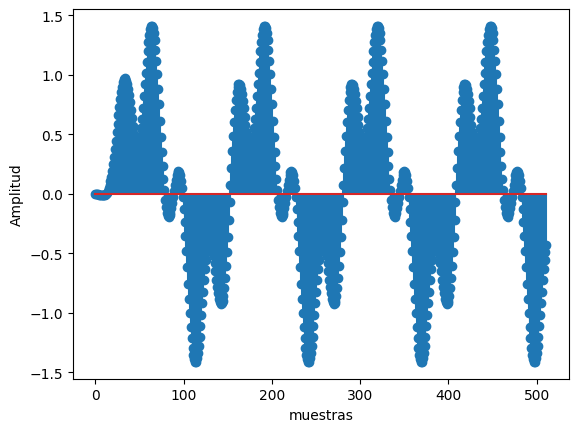

In [19]:
# Filtrar la señal con el filtro obtenido
y1n = signal.lfilter(h1n,1,xn)
plt.figure()
plt.stem(n,y1n)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()